In [ ]:
import pandas as pd
df = pd.read_csv("/content/data2.csv")
df

,textID,text,selected_text,mood,Sentiment_score_VADER,Sentiment_VADER_label
0,0,0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten im ambitious right,0.0772
1,1,1,im updating my blog because i feel shitty,sadness,im updating blog feel shitty,-0.5574
2,2,2,i never make her separate from me because i do...,sadness,never make separate ever want feel like ashamed,-0.0772
3,3,3,i left with my bouquet of red and yellow tulip...,joy,left bouquet red yellow tulip arm feeling slig...,0.3626
4,4,4,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten im ambitious right,0.0772
...,...,...,...,...,...,...
17999,17999,17999,i just had a very brief time in the beanbag an...,sadness,brief time beanbag said anna feel like beaten,-0.0772
18000,18000,18000,i am now turning and i feel pathetic that i am...,sadness,turning feel pathetic still waiting table subb...,-0.5719
18001,18001,18001,i feel strong and good overall,joy,feel strong good overall,0.7351
18002,18002,18002,i feel like this was such a rude comment and i...,anger,feel like rude comment im glad,0.3612


In [ ]:
df.isna().sum()

textID                   0
text                     0
selected_text            0
mood                     0
Sentiment_score_VADER    0
Sentiment_VADER_label    0
dtype: int64

In [ ]:
df["mood"].value_counts()

joy         6058
sadness     5250
anger       2434
fear        2161
love        1463
surprise     638
Name: mood, dtype: int64

<Axes: xlabel='mood', ylabel='count'>

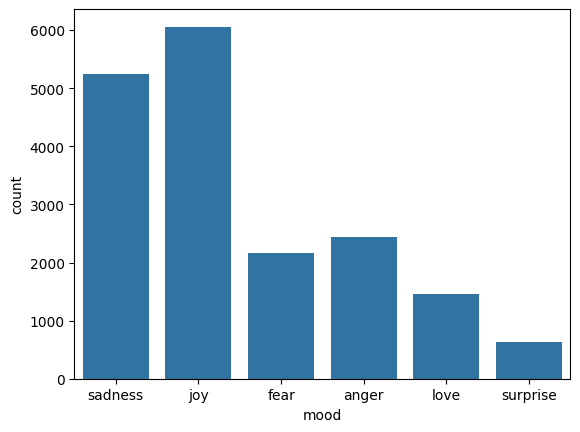

In [ ]:
import seaborn as sns
sns.countplot(x = df["mood"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["mood"] = le.fit_transform(df["mood"])
df

,textID,text,selected_text,mood,Sentiment_score_VADER,Sentiment_VADER_label
0,0,0,im feeling rather rotten so im not very ambiti...,4,im feeling rather rotten im ambitious right,0.0772
1,1,1,im updating my blog because i feel shitty,4,im updating blog feel shitty,-0.5574
2,2,2,i never make her separate from me because i do...,4,never make separate ever want feel like ashamed,-0.0772
3,3,3,i left with my bouquet of red and yellow tulip...,2,left bouquet red yellow tulip arm feeling slig...,0.3626
4,4,4,im feeling rather rotten so im not very ambiti...,4,im feeling rather rotten im ambitious right,0.0772
...,...,...,...,...,...,...
17999,17999,17999,i just had a very brief time in the beanbag an...,4,brief time beanbag said anna feel like beaten,-0.0772
18000,18000,18000,i am now turning and i feel pathetic that i am...,4,turning feel pathetic still waiting table subb...,-0.5719
18001,18001,18001,i feel strong and good overall,2,feel strong good overall,0.7351
18002,18002,18002,i feel like this was such a rude comment and i...,0,feel like rude comment im glad,0.3612


In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stemmer = SnowballStemmer("english")
tk = TweetTokenizer()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words("english")
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [ ]:
text = df["selected_text"].str.replace("[^a-zA-Z0-9]+"," ")

<ipython-input-9-5b2ea2a7e914>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text = df["selected_text"].str.replace("[^a-zA-Z0-9]+"," ")


In [ ]:
def token_and_vectorization(text):
  if isinstance(text, str):  # If input is a single string
        tokens = [stemmer.stem(token.lower()) for token in tk.tokenize(text) if token.lower() not in sw]

        text = " ".join(tokens)
        X = vectorizer.transform([text])
        X = X.toarray()
        X = pd.DataFrame(X)
        return X
  elif isinstance(text, pd.DataFrame) or isinstance(text, pd.Series):  # If input is DataFrame or Series
    text = text.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))

    text = text.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:" ".join(token))

    X = vectorizer.fit_transform(text)
    X = X.toarray()
    X = pd.DataFrame(X)
  return X

In [ ]:
X = token_and_vectorization(text)
X

,0,1,2,3,4,5,6,7,8,9,...,10816,10817,10818,10819,10820,10821,10822,10823,10824,10825
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df["mood"]
y

0        4
1        4
2        4
3        2
4        4
        ..
17999    4
18000    4
18001    2
18002    0
18003    4
Name: mood, Length: 18004, dtype: int64

In [ ]:
y.value_counts()

2    6058
4    5250
0    2434
1    2161
3    1463
5     638
Name: mood, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,y = sm.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1848
           1       0.94      0.96      0.95      1849
           2       0.90      0.81      0.85      1801
           3       0.88      0.97      0.93      1794
           4       0.93      0.85      0.89      1811
           5       0.96      1.00      0.98      1802

    accuracy                           0.92     10905
   macro avg       0.92      0.92      0.92     10905
weighted avg       0.92      0.92      0.92     10905



In [ ]:
string = input("enter the thoughts...:")
text = string.replace("[^a-zA-Z0-9]+"," ")

y_new = token_and_vectorization(text)


y_predict = rf.predict(y_new)

ind = le.inverse_transform(y_predict)
print(ind[0])

enter the thoughts...:The sound of waves crashing against the shore brings a sense of calm and tranquility, filling me with peace and serenity.
joy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(ind[0])